<a href="https://colab.research.google.com/github/honourjesus20/Hamoye_Internship/blob/main/stage_e_tag_along_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install -U openpyxl

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from fbprophet import Prophet
from matplotlib import rcParams
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns", None)


In [5]:
from google.colab import files
uploaded = files.upload()

Saving Time_series_analysis_and_forecast_DATASET.csv to Time_series_analysis_and_forecast_DATASET.csv


In [6]:
import io 
df = pd.read_csv(io.BytesIO(uploaded['Time_series_analysis_and_forecast_DATASET.csv']))

In [8]:
df.head()

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01 00:00:00,15.8,1688.215,3.69,23.710
1,2010-09-01 01:00:00,15.8,1669.195,3.69,22.635
2,2010-09-01 02:00:00,15.8,1491.980,3.69,22.565
3,2010-09-01 03:00:00,15.8,1330.760,3.69,18.910
4,2010-09-01 04:00:00,15.8,1247.940,3.69,18.030


In [9]:

df.fillna(df.mean(),inplace=True)

In [10]:
df.head()

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01 00:00:00,15.8,1688.215,3.69,23.710
1,2010-09-01 01:00:00,15.8,1669.195,3.69,22.635
2,2010-09-01 02:00:00,15.8,1491.980,3.69,22.565
3,2010-09-01 03:00:00,15.8,1330.760,3.69,18.910
4,2010-09-01 04:00:00,15.8,1247.940,3.69,18.030


In [11]:
round(df.corr(method="pearson").T,2)

,Tmax,SysLoad,GasPrice,ElecPrice
Tmax,1.00,-0.01,0.03,0.00
SysLoad,-0.01,1.00,-0.21,0.14
GasPrice,0.03,-0.21,1.00,0.16
ElecPrice,0.00,0.14,0.16,1.00


In [12]:
df.shape

(92016, 5)

In [13]:
df.isna().sum()

FullDate     0
Tmax         0
SysLoad      0
GasPrice     0
ElecPrice    0
dtype: int64

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92016 entries, 0 to 92015
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   FullDate   92016 non-null  object 
 1   Tmax       92016 non-null  float64
 2   SysLoad    92016 non-null  float64
 3   GasPrice   92016 non-null  float64
 4   ElecPrice  92016 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.5+ MB


In [15]:
df.columns

Index(['FullDate', 'Tmax', 'SysLoad', 'GasPrice', 'ElecPrice'], dtype='object')

In [16]:
df.columns=['Full_date','Tmax','Sysload','Gasprice','Elecprice']

In [17]:
df["Full_date"] = pd.to_datetime(df["Full_date"])

Text(0, 0.5, 'Elecprice')

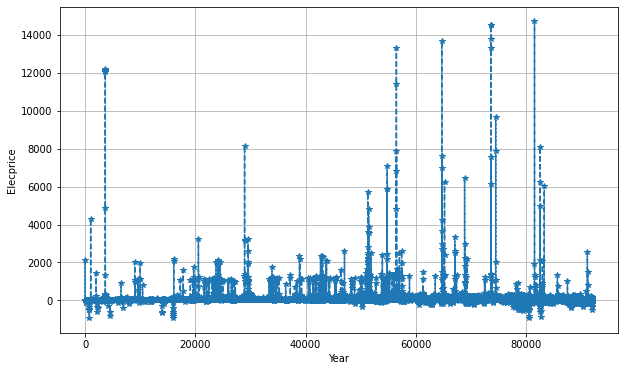

In [18]:
plt.figure(figsize=(10,6))
plt.plot(df.index, df.Elecprice, '--', marker='*', )
plt.grid()
plt.xlabel('Year')
plt.ylabel('Elecprice')

In [28]:
df=df.rename(columns={'Full_date':'ds','Elecprice':'y'})

In [30]:
df.head()

,ds,Tmax,Sysload,Gasprice,y
0,2010-09-01 00:00:00,15.8,1688.215,3.69,23.710
1,2010-09-01 01:00:00,15.8,1669.195,3.69,22.635
2,2010-09-01 02:00:00,15.8,1491.980,3.69,22.565
3,2010-09-01 03:00:00,15.8,1330.760,3.69,18.910
4,2010-09-01 04:00:00,15.8,1247.940,3.69,18.030


In [31]:
df=df.set_index('ds')

In [32]:
df_daily= df.resample('D').sum()
df_daily.shape

(3834, 4)

In [33]:
df_daily.corr().T

,Tmax,Sysload,Gasprice,y
Tmax,1.000000,-0.012249,0.030173,0.004748
Sysload,-0.012249,1.000000,-0.268321,0.170524
Gasprice,0.030173,-0.268321,1.000000,0.352420
y,0.004748,0.170524,0.352420,1.000000


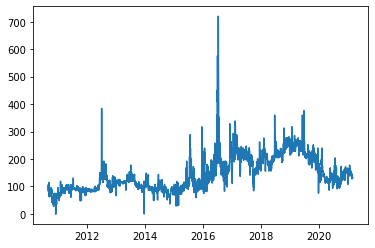

In [34]:
plt.plot(df_daily["Gasprice"])

In [36]:
df_daily.reset_index()

,ds,Tmax,Sysload,Gasprice,y
0,2010-09-01,379.2,41565.38000,88.5600,2751.700
1,2010-09-02,369.6,38898.99000,88.5600,570.810
2,2010-09-03,439.2,41665.76000,106.8000,504.975
3,2010-09-04,328.8,35638.08500,81.3600,502.275
4,2010-09-05,357.6,35611.41000,106.8000,500.555
...,...,...,...,...,...
3829,2021-02-24,537.6,-1525.49745,134.4000,634.770
3830,2021-02-25,518.4,4539.07855,130.5048,577.515
3831,2021-02-26,547.2,9517.02430,130.1808,1445.495
3832,2021-02-27,564.0,4932.88015,130.0800,488.980


In [39]:
df_daily.columns

Index(['Tmax', 'Sysload', 'Gasprice', 'y'], dtype='object')

In [40]:
df_daily.reset_index(inplace=True)

In [41]:
df_daily.dtypes

ds          datetime64[ns]
Tmax               float64
Sysload            float64
Gasprice           float64
y                  float64
dtype: object

In [42]:
mapping = {'Full_date':'ds','Elecprice':'y', 'Tmax':'A', 'Sysload':'B',
       'Gasprice':'C'}
df_daily = df_daily.rename(mapping, axis=1)

In [43]:
df_daily.head()

,ds,A,B,C,y
0,2010-09-01,379.2,41565.380,88.56,2751.700
1,2010-09-02,369.6,38898.990,88.56,570.810
2,2010-09-03,439.2,41665.760,106.80,504.975
3,2010-09-04,328.8,35638.085,81.36,502.275
4,2010-09-05,357.6,35611.410,106.80,500.555


In [44]:
model = Prophet()

In [45]:
model.add_regressor('A')
model.add_regressor('B')
model.add_regressor('C')

In [46]:
train = df_daily.iloc[:2757]
test = df_daily.iloc[2757:]

In [47]:
train

,ds,A,B,C,y
0,2010-09-01,379.2,41565.38000,88.5600,2751.700
1,2010-09-02,369.6,38898.99000,88.5600,570.810
2,2010-09-03,439.2,41665.76000,106.8000,504.975
3,2010-09-04,328.8,35638.08500,81.3600,502.275
4,2010-09-05,357.6,35611.41000,106.8000,500.555
...,...,...,...,...,...
2752,2018-03-15,609.6,27139.02585,220.6272,2717.340
2753,2018-03-16,648.0,19710.46400,216.9600,2277.335
2754,2018-03-17,724.8,1079.34705,209.0400,1718.385
2755,2018-03-18,508.8,-4102.43795,203.9880,1088.015


In [48]:
train.columns

Index(['ds', 'A', 'B', 'C', 'y'], dtype='object')

In [49]:

print(train.shape)
print(test.shape)

(2757, 5)
(1077, 5)


In [50]:
model.fit(train)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [51]:
future = model.predict(test)

In [52]:
future.shape

(1077, 31)

In [53]:
future

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,A,A_lower,A_upper,B,B_lower,B_upper,C,C_lower,C_upper,additive_terms,additive_terms_lower,additive_terms_upper,extra_regressors_additive,extra_regressors_additive_lower,extra_regressors_additive_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-03-20,1865.896478,-268.565301,4374.349881,1865.896478,1865.896478,0.235947,0.235947,0.235947,-856.397810,-856.397810,-856.397810,1099.631025,1099.631025,1099.631025,120.032302,120.032302,120.032302,243.469161,243.469161,243.469161,-84.514318,-84.514318,-84.514318,-38.922541,-38.922541,-38.922541,0.0,0.0,0.0,1985.928781
1,2018-03-21,1866.582912,-160.653545,4255.662769,1866.582912,1866.582912,0.233148,0.233148,0.233148,-1026.414783,-1026.414783,-1026.414783,1124.065040,1124.065040,1124.065040,110.722603,110.722603,110.722603,97.883404,97.883404,97.883404,42.487809,42.487809,42.487809,-29.648609,-29.648609,-29.648609,0.0,0.0,0.0,1977.305515
2,2018-03-22,1867.269345,541.672390,5205.930671,1867.269345,1867.269345,0.219583,0.219583,0.219583,-214.963890,-214.963890,-214.963890,1124.065040,1124.065040,1124.065040,1030.282748,1030.282748,1030.282748,909.320733,909.320733,909.320733,145.592749,145.592749,145.592749,-24.630734,-24.630734,-24.630734,0.0,0.0,0.0,2897.552092
3,2018-03-23,1867.955778,338.279799,4862.006329,1867.955778,1867.955778,0.211616,0.211616,0.211616,-274.903564,-274.903564,-274.903564,1056.528719,1056.528719,1056.528719,713.776761,713.776761,713.776761,781.836772,781.836772,781.836772,-44.332666,-44.332666,-44.332666,-23.727345,-23.727345,-23.727345,0.0,0.0,0.0,2581.732539
4,2018-03-24,1868.642211,-612.842801,3696.274921,1868.642211,1868.642211,0.209679,0.209679,0.209679,-1076.461166,-1076.461166,-1076.461166,786.559223,786.559223,786.559223,-433.877881,-433.877881,-433.877881,-289.692264,-289.692264,-289.692264,-117.498131,-117.498131,-117.498131,-26.687486,-26.687486,-26.687486,0.0,0.0,0.0,1434.764330
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1072,2021-02-24,2601.752905,-1271.513096,3376.133985,1816.948023,3372.476704,0.236162,0.236162,0.236162,-1372.370844,-1372.370844,-1372.370844,115.414844,115.414844,115.414844,-1647.856689,-1647.856689,-1647.856689,-1256.719838,-1256.719838,-1256.719838,42.487809,42.487809,42.487809,-433.624659,-433.624659,-433.624659,0.0,0.0,0.0,953.896217
1073,2021-02-25,2602.439338,-1171.344904,3710.649644,1816.760818,3373.864522,0.237885,0.237885,0.237885,-1033.071453,-1033.071453,-1033.071453,58.355267,58.355267,58.355267,-1288.931951,-1288.931951,-1288.931951,-974.478301,-974.478301,-974.478301,145.592749,145.592749,145.592749,-460.046399,-460.046399,-460.046399,0.0,0.0,0.0,1313.507388
1074,2021-02-26,2603.125772,-929.009973,3736.113970,1816.573614,3375.252340,0.235301,0.235301,0.235301,-754.566580,-754.566580,-754.566580,53.609092,53.609092,53.609092,-1225.751919,-1225.751919,-1225.751919,-700.722188,-700.722188,-700.722188,-44.332666,-44.332666,-44.332666,-480.697066,-480.697066,-480.697066,0.0,0.0,0.0,1377.373852
1075,2021-02-27,2603.812205,-1181.029385,3394.475944,1816.135798,3376.640158,0.233794,0.233794,0.233794,-1011.039138,-1011.039138,-1011.039138,52.132504,52.132504,52.132504,-1571.510249,-1571.510249,-1571.510249,-958.672841,-958.672841,-958.672841,-117.498131,-117.498131,-117.498131,-495.339277,-495.339277,-495.339277,0.0,0.0,0.0,1032.301956


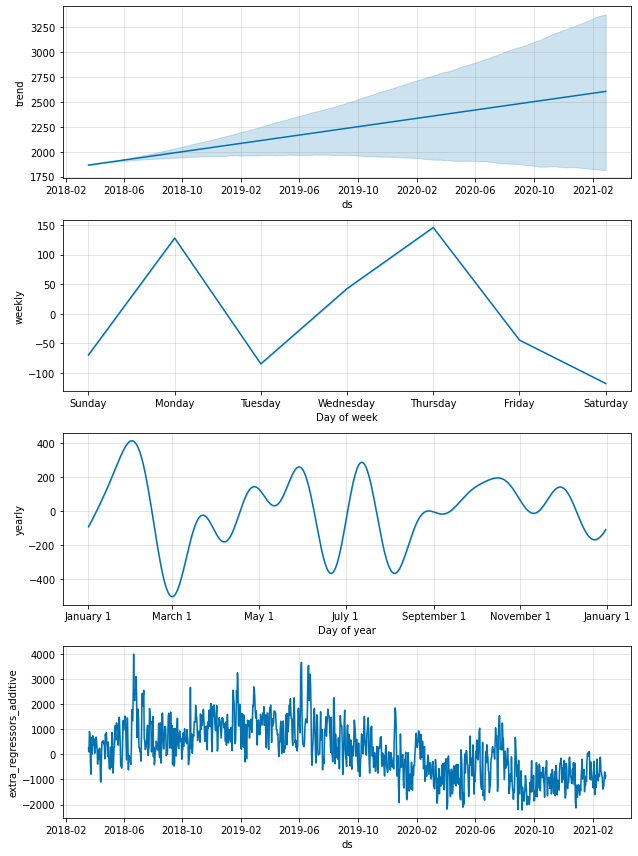

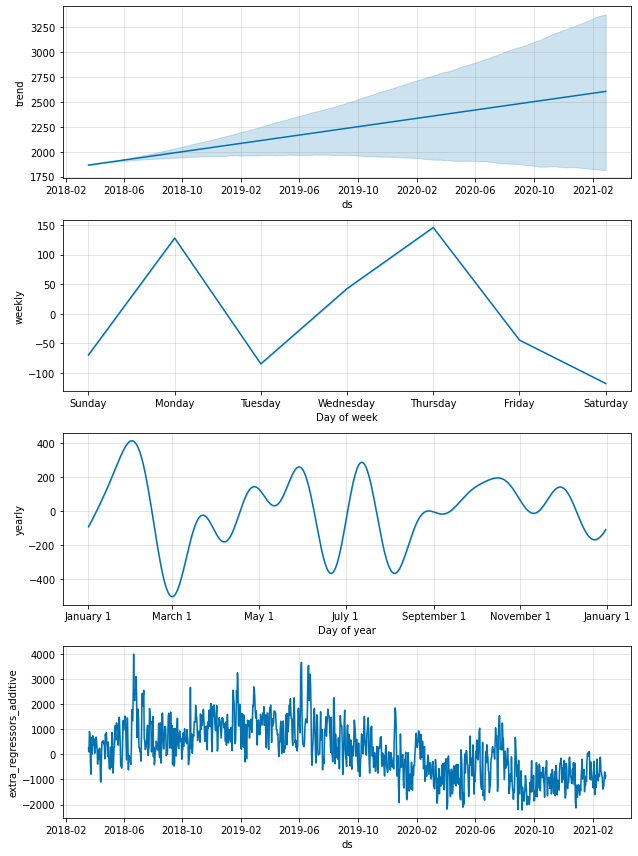

In [54]:
model.plot_components(future)

In [55]:
from sklearn.metrics import mean_squared_error as MSE, mean_absolute_percentage_error as MAPE

In [56]:
Y = np.array(test["y"])
Y_pred = np.array(future["yhat"])
mape = np.mean(np.abs((Y - Y_pred) / Y)) * 100
round(mape,4)

231.3834

In [57]:
from sklearn.metrics import mean_squared_error

In [58]:
mse = mean_squared_error(Y, Y_pred)
rmse = np.sqrt(mse)
rmse

2707.0355566662724

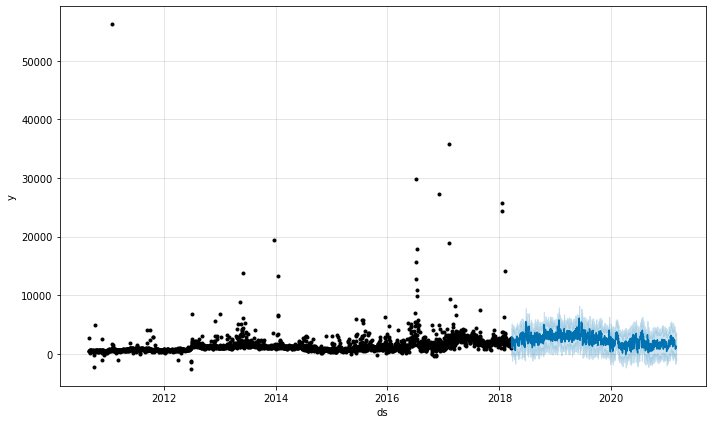

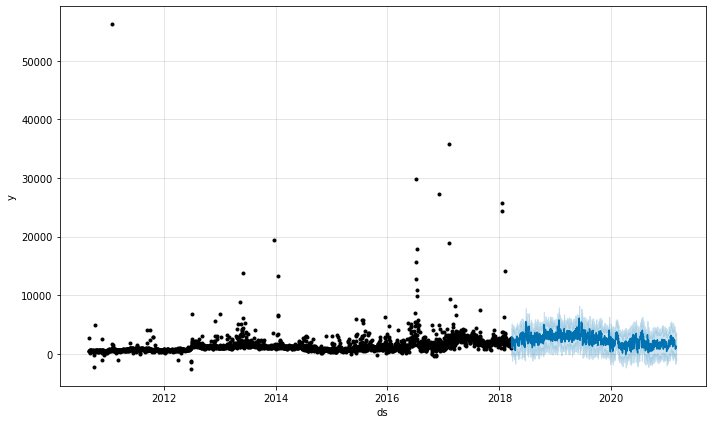

In [59]:
rcParams["figure.figsize"] = (20,8)
model.plot(future)

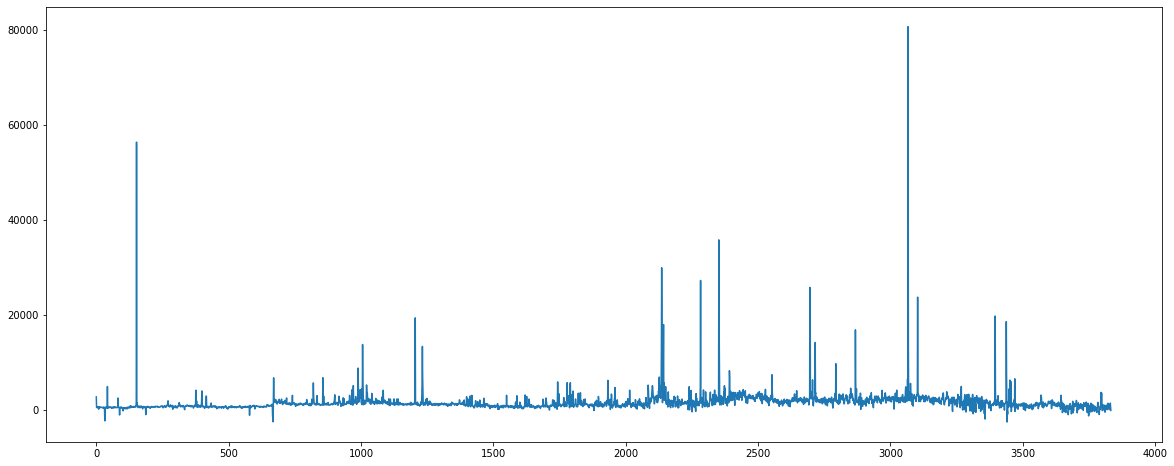

In [60]:
rcParams["figure.figsize"] = (20,8)
plt.plot(df_daily["y"])

In [ ]:
future = model.make_future_dataframe(periods=10, freq='M') 
forecast = model.predict(future) 
forecast.head()
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper', 'trend', 'trend_lower', 'trend_upper']]

In [74]:
future_1 = models.predict(new_test)
future_1

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-03-20,2691.764386,17.088273,4976.747880,2691.764386,2691.764386,-155.426892,-155.426892,-155.426892,9.749221,9.749221,9.749221,-165.176114,-165.176114,-165.176114,0.0,0.0,0.0,2536.337494
1,2018-03-21,2692.580955,228.749820,5149.933062,2692.580955,2692.580955,-2.925496,-2.925496,-2.925496,159.308129,159.308129,159.308129,-162.233625,-162.233625,-162.233625,0.0,0.0,0.0,2689.655459
2,2018-03-22,2693.397524,226.818029,5066.911284,2693.397524,2693.397524,95.308217,95.308217,95.308217,257.036327,257.036327,257.036327,-161.728110,-161.728110,-161.728110,0.0,0.0,0.0,2788.705741
3,2018-03-23,2694.214093,100.081197,5032.095546,2694.214093,2694.214093,-113.236873,-113.236873,-113.236873,50.257478,50.257478,50.257478,-163.494350,-163.494350,-163.494350,0.0,0.0,0.0,2580.977221
4,2018-03-24,2695.030663,-164.572248,4673.910031,2695.030663,2695.030663,-438.662722,-438.662722,-438.662722,-271.372061,-271.372061,-271.372061,-167.290660,-167.290660,-167.290660,0.0,0.0,0.0,2256.367941
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1072,2021-02-24,3567.126543,625.925791,6380.434479,1915.012665,5232.239381,-91.262777,-91.262777,-91.262777,159.308129,159.308129,159.308129,-250.570906,-250.570906,-250.570906,0.0,0.0,0.0,3475.863766
1073,2021-02-25,3567.943112,655.688375,6329.137134,1913.854881,5235.785665,-25.199382,-25.199382,-25.199382,257.036327,257.036327,257.036327,-282.235709,-282.235709,-282.235709,0.0,0.0,0.0,3542.743730
1074,2021-02-26,3568.759681,242.542254,6262.687391,1912.697097,5239.331950,-259.098963,-259.098963,-259.098963,50.257478,50.257478,50.257478,-309.356441,-309.356441,-309.356441,0.0,0.0,0.0,3309.660718
1075,2021-02-27,3569.576250,98.416071,5843.743012,1911.539313,5242.878235,-603.110641,-603.110641,-603.110641,-271.372061,-271.372061,-271.372061,-331.738579,-331.738579,-331.738579,0.0,0.0,0.0,2966.465610


In [75]:
new_df = df_daily[["ds","y"]]
new_df


,ds,y
0,2010-09-01,2751.700
1,2010-09-02,570.810
2,2010-09-03,504.975
3,2010-09-04,502.275
4,2010-09-05,500.555
...,...,...
3829,2021-02-24,634.770
3830,2021-02-25,577.515
3831,2021-02-26,1445.495
3832,2021-02-27,488.980


In [61]:
new_train = df_daily.iloc[:2757]
new_test = df_daily.iloc[2757:]

In [62]:
models = Prophet()

In [63]:
models.fit(new_train)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [64]:
future_1 = models.predict(new_test)
future_1

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-03-20,2691.764386,158.939897,4771.073883,2691.764386,2691.764386,-155.426892,-155.426892,-155.426892,9.749221,9.749221,9.749221,-165.176114,-165.176114,-165.176114,0.0,0.0,0.0,2536.337494
1,2018-03-21,2692.580955,373.651198,5213.754980,2692.580955,2692.580955,-2.925496,-2.925496,-2.925496,159.308129,159.308129,159.308129,-162.233625,-162.233625,-162.233625,0.0,0.0,0.0,2689.655459
2,2018-03-22,2693.397524,447.431709,5037.789254,2693.397524,2693.397524,95.308217,95.308217,95.308217,257.036327,257.036327,257.036327,-161.728110,-161.728110,-161.728110,0.0,0.0,0.0,2788.705741
3,2018-03-23,2694.214093,163.608596,4913.560170,2694.214093,2694.214093,-113.236873,-113.236873,-113.236873,50.257478,50.257478,50.257478,-163.494350,-163.494350,-163.494350,0.0,0.0,0.0,2580.977221
4,2018-03-24,2695.030663,-158.090804,4476.842345,2695.030663,2695.030663,-438.662722,-438.662722,-438.662722,-271.372061,-271.372061,-271.372061,-167.290660,-167.290660,-167.290660,0.0,0.0,0.0,2256.367941
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1072,2021-02-24,3567.126543,542.590284,6334.984416,1899.614430,5300.580401,-91.262777,-91.262777,-91.262777,159.308129,159.308129,159.308129,-250.570906,-250.570906,-250.570906,0.0,0.0,0.0,3475.863766
1073,2021-02-25,3567.943112,655.884127,6570.855317,1898.771395,5302.179771,-25.199382,-25.199382,-25.199382,257.036327,257.036327,257.036327,-282.235709,-282.235709,-282.235709,0.0,0.0,0.0,3542.743730
1074,2021-02-26,3568.759681,350.412442,6174.079448,1898.637863,5303.779141,-259.098963,-259.098963,-259.098963,50.257478,50.257478,50.257478,-309.356441,-309.356441,-309.356441,0.0,0.0,0.0,3309.660718
1075,2021-02-27,3569.576250,73.575316,5939.780153,1899.082996,5305.378511,-603.110641,-603.110641,-603.110641,-271.372061,-271.372061,-271.372061,-331.738579,-331.738579,-331.738579,0.0,0.0,0.0,2966.465610


In [65]:
Y = np.array(new_test["y"])
Y_pred = np.array(future_1["yhat"])
mape1 = MAPE(Y, Y_pred)

mape1

5.494751413716547

In [66]:
import statsmodels.api as sm
from pylab import rcParams
rcParams["figure.figsize"] = (20,15)
decompose_series = sm.tsa.seasonal_decompose(df_daily["y"].head(100), model="additive",extrapolate_trend='freq',period=3)
decompose_series.plot()
plt.show()

TypeError: ignored

In [67]:
rmse1 = np.sqrt(MSE(Y,Y_pred)) 
rmse1

3218.15577651241

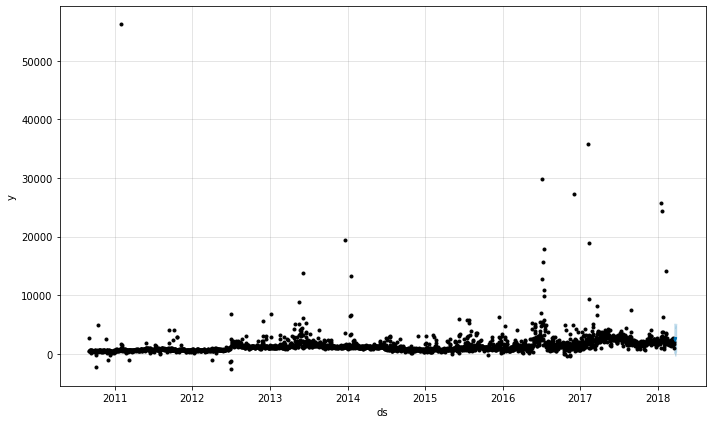

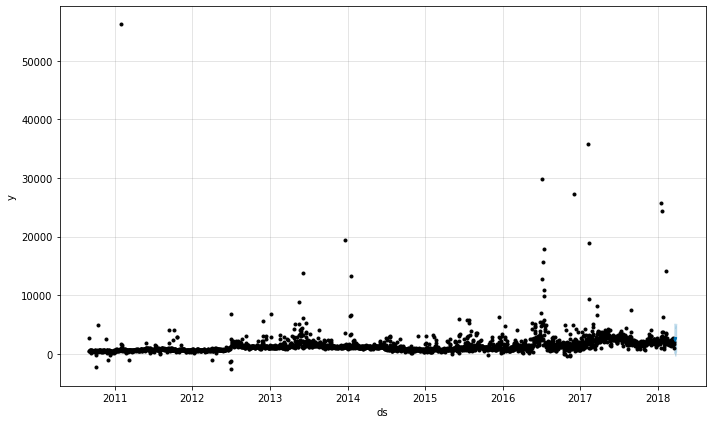

In [68]:
rcParams["figure.figsize"] = (20,8)
model.plot(future_1.head(10))

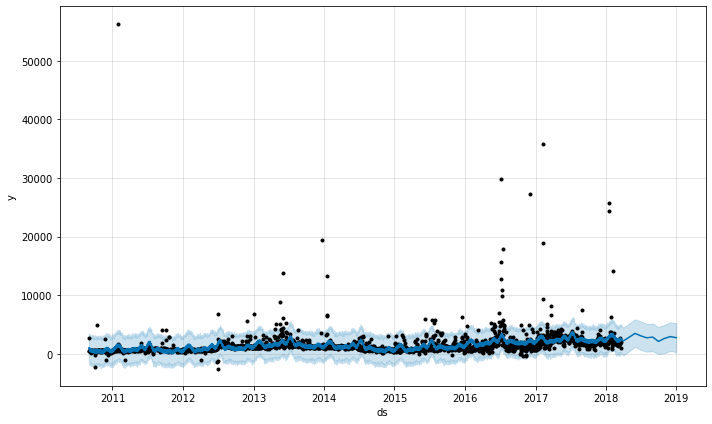

In [69]:
fut = models.make_future_dataframe(periods= 10 , freq= 'M' ) 
forecast = models.predict(fut) 
forecast.head()
rcParams["figure.figsize"] = (30,10)
model.plot(forecast)
plt.show()

In [71]:
df_merge = pd.merge(new_train, forecast[['ds','yhat_lower','yhat_upper','yhat']],on='ds')
df_merge = df_merge[['ds','yhat_lower','yhat_upper','yhat','y']]
df_merge.head()

,ds,yhat_lower,yhat_upper,yhat,y
0,2010-09-01,-1385.310487,3293.704251,996.028134,2751.700
1,2010-09-02,-1201.858222,3506.358911,1076.181083,570.810
2,2010-09-03,-1485.888751,3335.519108,851.092206,504.975
3,2010-09-04,-1827.360472,2978.786738,510.753732,502.275
4,2010-09-05,-1897.352401,2727.336862,420.690845,500.555


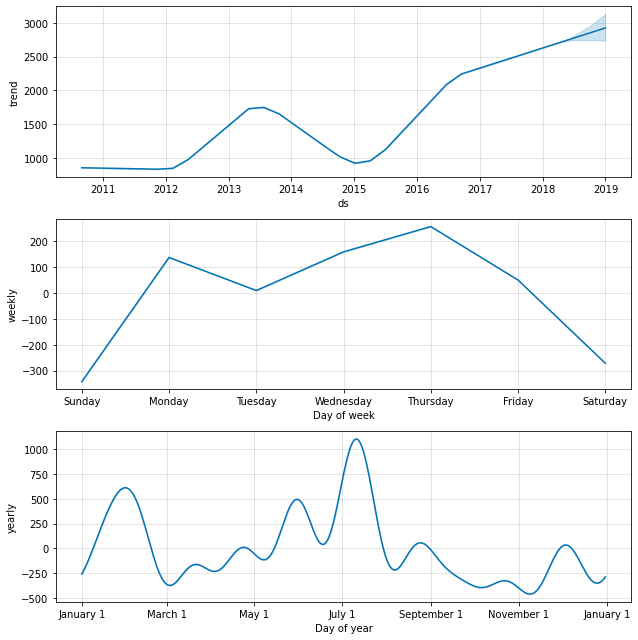

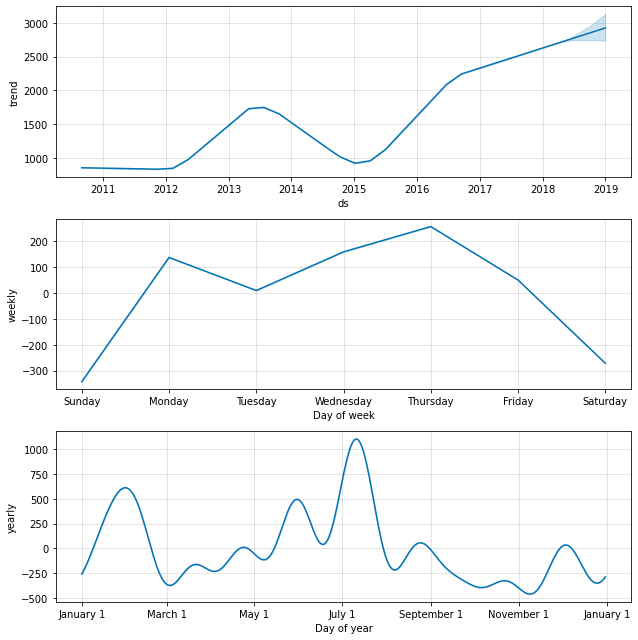

In [70]:
models.plot_components(forecast)

In [79]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error


In [80]:
y_true = df_merge['y'].values
y_pred = df_merge['yhat'].values
mae_01 = mean_absolute_error(y_true, y_pred)
mape_01 = mean_absolute_percentage_error(y_true, y_pred)

In [81]:
mae_01

622.3738732949184

In [82]:
mape_01

0.5956227791978224